In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression  #true or false
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt 


In [87]:
data = pd.read_csv(r"C:\Users\pc\Desktop\Data science\50_startups_sample (6).csv",encoding='latin1')
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [89]:

X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

In [90]:
print(X)

   R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida


In [91]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ["State"])],
)
X = ct.fit_transform(X)

In [92]:
print(x)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [97]:
y_pred = model.predict(X_test)  

In [96]:
print("Model Performance:")
print("r2_score", r2_score(y_test, y_pred))

Model Performance:
r2_score nan


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [75]:
# Get user inputs
rnd_spend = float(input("Enter R&D Spend: "))
admin_spend = float(input("Enter Administration: "))
marketing_spend = float(input("Enter Marketing Spend: "))
state = input("Enter State (e.g. New York, California, Florida): ")

In [98]:
# Create input DataFrame
input_df = pd.DataFrame({
    'R&D Spend': [rnd_spend],
    'Administration': [admin_spend],
    'Marketing Spend': [marketing_spend],
    'State': [state]
})

# Transform input and predict
input_encoded = ct.transform(input_df)
predicted_profit = model.predict(input_encoded)[0]

print(f"Predicted Profit: {predicted_profit:.2f}")

Predicted Profit: 178619.17


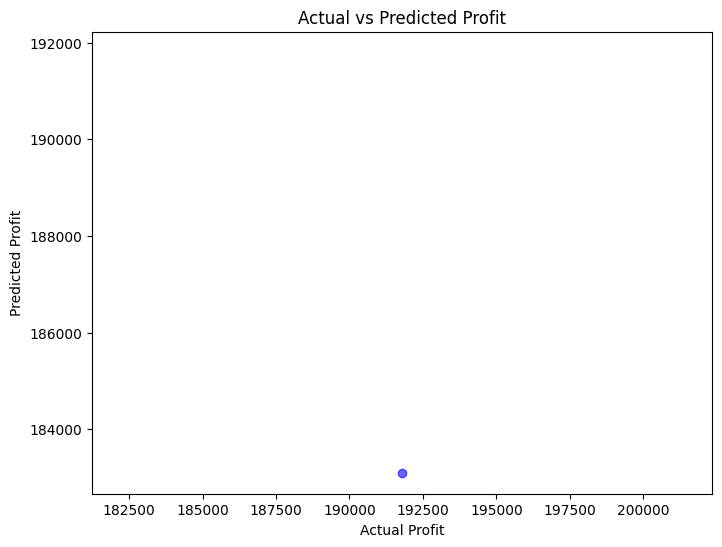

In [ ]:
# plt.figure(figsize=(8,6))
# plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line y=x
# plt.xlabel('Actual Profit')
# plt.ylabel('Predicted Profit')
# plt.title('Actual vs Predicted Profit')
# plt.show()
